In [350]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
import PIL.Image as pilimg
import os

%matplotlib inline

In [351]:
# 현재 경로 얻는 방법
os.getcwd()

'/kaggle/working'

In [352]:
# 해당 경로에 어떤 파일이 있는지 아는 방법
os.listdir('/kaggle/input')

['cat-classification']

In [353]:
data_dir = '/kaggle/input/cat-classification/'
train_data_path = data_dir + 'train_catvnoncat.h5'
test_data_path = data_dir + 'test_catvnoncat.h5'

In [354]:

def load_dataset():
    train_dataset = h5py.File(train_data_path, "r")
    train_set_x_orig = torch.FloatTensor(train_dataset["train_set_x"][:]) # your train set features
    train_set_y= torch.FloatTensor(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_data_path, "r")
    test_set_x_orig = torch.FloatTensor(test_dataset["test_set_x"][:]) # your test set features
    test_set_y = torch.FloatTensor(test_dataset["test_set_y"][:]) # your test set labels

    classes = torch.FloatTensor([0, 1]) # 0 : NonCat, 1: Cat
    train_set_y= train_set_y.view((1, train_set_y.shape[0]))
    test_set_y = test_set_y.view((1, test_set_y.shape[0]))
    
    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes

In [355]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [356]:
print(train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes)

tensor([[[[215., 217., 214.],
          [217., 219., 216.],
          [221., 223., 220.],
          ...,
          [198., 202., 201.],
          [193., 197., 196.],
          [190., 194., 193.]],

         [[218., 220., 217.],
          [220., 222., 219.],
          [223., 225., 222.],
          ...,
          [201., 205., 204.],
          [196., 200., 199.],
          [192., 196., 195.]],

         [[221., 223., 220.],
          [223., 225., 222.],
          [226., 228., 225.],
          ...,
          [204., 208., 207.],
          [199., 203., 202.],
          [196., 200., 199.]],

         ...,

         [[ 72.,  68.,  65.],
          [ 65.,  61.,  58.],
          [ 72.,  68.,  65.],
          ...,
          [199., 211., 223.],
          [202., 214., 228.],
          [204., 216., 230.]],

         [[ 62.,  58.,  55.],
          [ 59.,  55.,  52.],
          [ 70.,  66.,  63.],
          ...,
          [198., 210., 222.],
          [200., 214., 227.],
          [203., 217., 230.]],



In [357]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 200
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: torch.Size([200, 64, 64, 3])
train_set_y shape: torch.Size([1, 200])
test_set_x shape: torch.Size([50, 64, 64, 3])
test_set_y shape: torch.Size([1, 50])


In [358]:
# Reshape the training and test examples

train_set_x_flatten = torch.transpose(train_set_x_orig.view(train_set_x_orig.shape[0],-1),0,1)
test_set_x_flatten = torch.transpose(test_set_x_orig.view(test_set_x_orig.shape[0],-1),0,1)

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: torch.Size([12288, 200])
train_set_y shape: torch.Size([1, 200])
test_set_x_flatten shape: torch.Size([12288, 50])
test_set_y shape: torch.Size([1, 50])


In [359]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [360]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### 
    s = 1 / (1 + torch.exp(-z))
    ### END CODE HERE ###
    
    return s

In [361]:
print ("sigmoid([0, 2]) = " + str(sigmoid(torch.FloatTensor([0,2]))))


sigmoid([0, 2]) = tensor([0.5000, 0.8808])


In [362]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = torch.zeros(dim,1)
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [363]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = tensor([[0.],
        [0.]])
b = 0


In [364]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):

    
    m = X.shape[1]
    
    w_T = torch.transpose(w,0,1)
    A = sigmoid(torch.matmul(w_T,X) + b)                                  # compute activation
    cost = -torch.sum(Y * torch.log(A) + (1-Y) * torch.log(1-A)) / m      # compute cost

    dw = torch.matmul(X, torch.transpose(A-Y,0,1)) / m
    db = torch.sum(A-Y,1) / m

    cost = torch.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [365]:
w, b, X, Y = torch.Tensor([[1.],[2.]]), 2., torch.Tensor([[1.,2.,-1.],[3.,4.,-3.2]]), torch.IntTensor([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = tensor([[0.9985],
        [2.3951]])
db = tensor([0.0015])
cost = tensor(5.7986)


In [366]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations + 1):
        
        
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [367]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = tensor([[0.1843],
        [0.1100]])
b = tensor([1.9234])
dw = tensor([[0.6717],
        [1.4005]])
db = tensor([0.2195])


In [368]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = torch.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    w_T = torch.transpose(w,0,1)
    A = sigmoid(torch.matmul(w_T,X) + b)
    
    for i in range(A.shape[1]):
        A_value = A[0][i].item()
        if A_value > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        
    
    
    return Y_prediction

In [369]:
w = torch.FloatTensor([[0.1124579],[0.23106775]])
b = -0.3
X = torch.FloatTensor([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = tensor([[1., 1., 0.]])


In [370]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
   
    
    
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)


    print("train accuracy: {} %".format(100 - torch.mean(torch.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - torch.mean(torch.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [371]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.0025, print_cost = True)


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.423440
Cost after iteration 200: 0.353499
Cost after iteration 300: 0.310512
Cost after iteration 400: 0.279283
Cost after iteration 500: 0.254729
Cost after iteration 600: 0.234525
Cost after iteration 700: 0.217417
Cost after iteration 800: 0.202649
Cost after iteration 900: 0.189723
Cost after iteration 1000: 0.178293
train accuracy: 98.5 %
test accuracy: 80.0 %


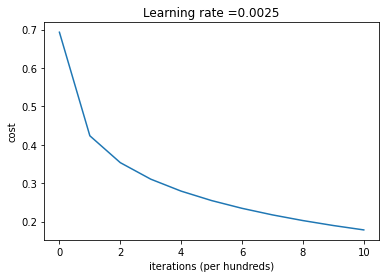

In [376]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()